In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# cargar datasets
df_companies = pd.read_csv('/datasets/project_sql_result_01.csv')
df_dropoff = pd.read_csv('/datasets/project_sql_result_04.csv')

# vista inicial
df_companies.head(), df_dropoff.head()


(                      company_name  trips_amount
 0                        Flash Cab         19558
 1        Taxi Affiliation Services         11422
 2                Medallion Leasing         10367
 3                       Yellow Cab          9888
 4  Taxi Affiliation Service Yellow          9299,
   dropoff_location_name  average_trips
 0                  Loop   10727.466667
 1           River North    9523.666667
 2         Streeterville    6664.666667
 3             West Loop    5163.666667
 4                O'Hare    2546.900000)

In [2]:
df_companies.info()
df_dropoff.info()

df_companies.describe()
df_dropoff.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64 entries, 0 to 63
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   company_name  64 non-null     object
 1   trips_amount  64 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   dropoff_location_name  94 non-null     object 
 1   average_trips          94 non-null     float64
dtypes: float64(1), object(1)
memory usage: 1.6+ KB


,average_trips
count,94.000000
mean,599.953728
std,1714.591098
min,1.800000
25%,14.266667
50%,52.016667
75%,298.858333
max,10727.466667


In [4]:
#Poner todo numerico
df_companies['trips_amount'] = df_companies['trips_amount'].astype(int)
df_dropoff['average_trips'] = df_dropoff['average_trips'].astype(float)


In [5]:
top10_dropoff = (
    df_dropoff
    .sort_values(by='average_trips', ascending=False)
    .head(10)
)

top10_dropoff


,dropoff_location_name,average_trips
0,Loop,10727.466667
1,River North,9523.666667
2,Streeterville,6664.666667
3,West Loop,5163.666667
4,O'Hare,2546.900000
5,Lake View,2420.966667
6,Grant Park,2068.533333
7,Museum Campus,1510.000000
8,Gold Coast,1364.233333
9,Sheffield & DePaul,1259.766667


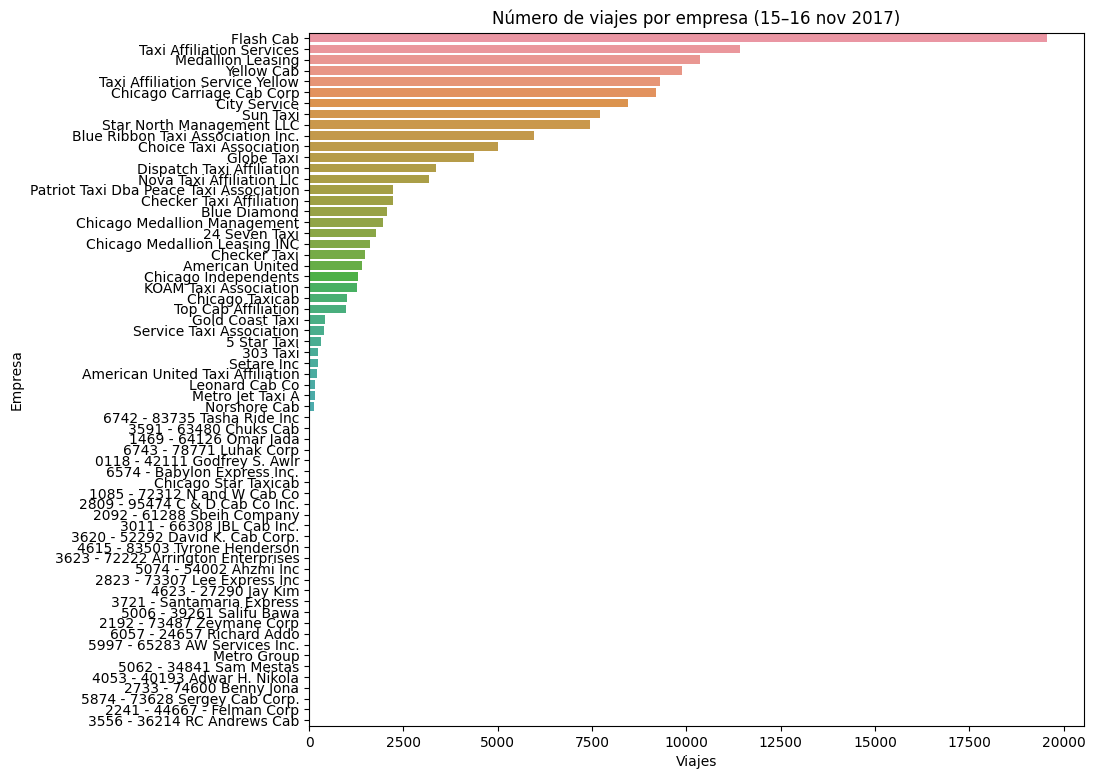

In [9]:
#Empresas vs número de viajes
plt.figure(figsize=(10,9))
sns.barplot(
    data=df_companies.sort_values(by='trips_amount', ascending=False),
    x='trips_amount',
    y='company_name'
)
plt.title('Número de viajes por empresa (15–16 nov 2017)')
plt.xlabel('Viajes')
plt.ylabel('Empresa')
plt.show()


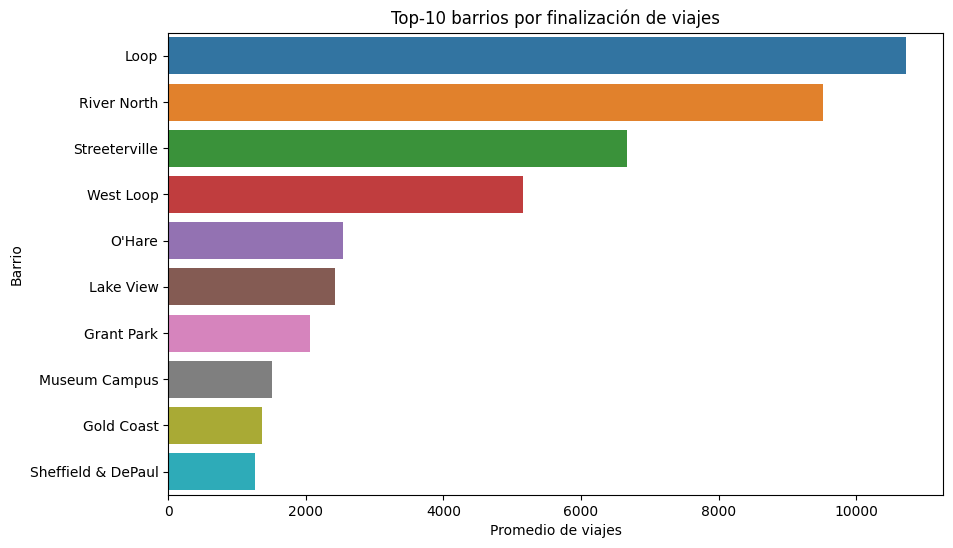

In [10]:
#Top Barrios
plt.figure(figsize=(10,6))
sns.barplot(
    data=top10_dropoff,
    x='average_trips',
    y='dropoff_location_name'
)
plt.title('Top-10 barrios por finalización de viajes')
plt.xlabel('Promedio de viajes')
plt.ylabel('Barrio')
plt.show()


In [11]:
#Conclusiones en la primera exploracion para Compañias
#Flash Cab y Taxi Affiliation Services dominan el mercado aunque alto margen para Flash Cab 
#Competencia alta entre líderes.


In [12]:
#Conclusiones en la primera exploracion para Barrios
#Loop y River North aparecen en el top.
#Estos barrios representan nodos críticos de movilidad.
#Son ubicaciones estratégicas para Zuber.

In [13]:
#dataset 07
df_weather_trips = pd.read_csv('/datasets/project_sql_result_07.csv')

df_weather_trips.info()
df_weather_trips.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1068 entries, 0 to 1067
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   start_ts            1068 non-null   object 
 1   weather_conditions  1068 non-null   object 
 2   duration_seconds    1068 non-null   float64
dtypes: float64(1), object(2)
memory usage: 25.2+ KB


,start_ts,weather_conditions,duration_seconds
0,2017-11-25 16:00:00,Good,2410.0
1,2017-11-25 14:00:00,Good,1920.0
2,2017-11-25 12:00:00,Good,1543.0
3,2017-11-04 10:00:00,Good,2512.0
4,2017-11-11 07:00:00,Good,1440.0


In [14]:
""""Hipótesis
Queremos evaluar:
La duración promedio de los viajes cambia los sábados lluviosos

Hipótesis nula (H₀):

La duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos.

Hipótesis alternativa (H₁):

La duración promedio de los viajes en sábados lluviosos es diferente.

Test bilateral.

Nivel de significación

Elegimos:

alpha = 0.05

Valor estándar en análisis estadístico."""

'"Hipótesis\nQueremos evaluar:\nLa duración promedio de los viajes cambia los sábados lluviosos\n\nHipótesis nula (H₀):\n\nLa duración promedio de los viajes en sábados lluviosos es igual a la de sábados no lluviosos.\n\nHipótesis alternativa (H₁):\n\nLa duración promedio de los viajes en sábados lluviosos es diferente.\n\nTest bilateral.\n\nNivel de significación\n\nElegimos:\n\nalpha = 0.05\n\nValor estándar en análisis estadístico.'

In [15]:
#Clima con lluvia-Clima bueno
rainy = df_weather_trips[df_weather_trips['weather_conditions'] == 'Bad']['duration_seconds']
good = df_weather_trips[df_weather_trips['weather_conditions'] == 'Good']['duration_seconds']


In [16]:
from scipy import stats

results = stats.ttest_ind(rainy, good, equal_var=False)

results


Ttest_indResult(statistic=7.186034288068629, pvalue=6.738994326108734e-12)

In [18]:
p_value = results.pvalue
alpha = 0.05

print("p-value:", p_value)

if p_value < alpha:
    print("Rechazamos H0 → hay diferencia significativa")
else:
    print("No rechazamos H0 → no hay evidencia suficiente")


p-value: 6.738994326108734e-12
Rechazamos H0 → hay diferencia significativa


In [19]:
#CONCLUSIONES
#Se estableció un nivel de significación de 0.05.
#Se planteó una prueba bilateral ya que queríamos detectar cualquier cambio en la duración promedio.
#Se aplicó un t-test de Welch debido a que no se asumió igualdad de varianzas entre grupos.
#El valor p obtenido fue 6.738994326108734e-12, por lo que se rechaza la hipótesis nula.
#Esto indica que las condiciones climáticas lluviosas los sábados no afectan de forma significativa la duración promedio de los viajes de Loop a O’Hare.